In [1]:
import numpy as np
import matplotlib.pyplot as plt
import  pandas  as pd
#basic ML import
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn .impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
data_url="https://raw.githubusercontent.com/digipodium/Datasets/main/carsspeed.csv"
df=pd.read_csv(data_url,index_col=0)
df.head()

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16


In [3]:
df.shape

(50, 2)

<AxesSubplot:xlabel='speed', ylabel='dist'>

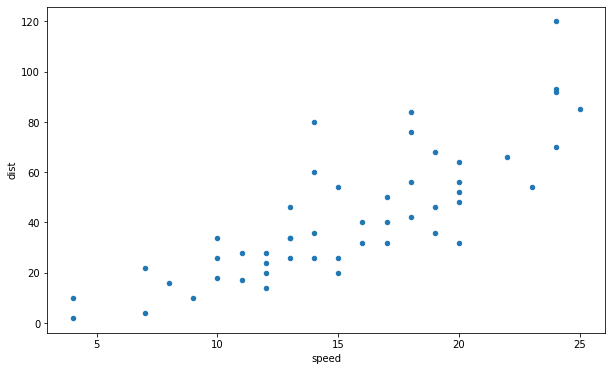

In [4]:
df.plot(x='speed',y='dist',kind='scatter',figsize=(10,6))

In [5]:
# step 2
x=df[['speed']]#2d vector
y=df[['dist']]#1d scaler

In [6]:
#step 3

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)

In [7]:
#step 4
from sklearn.linear_model import LinearRegression
reg=LinearRegression()#no parameter required
reg.fit(xtrain,ytrain)#training the algorithms

LinearRegression()

In [8]:
score =reg.score(xtest,ytest)*100
print(f'the score is {score}%for our model')


the score is 61.5910985813624%for our model


In [9]:
df['prediction']=reg.predict(x)
df

,speed,dist,prediction
1,4,2,0.218970
2,4,10,0.218970
3,7,4,11.590485
4,7,22,11.590485
5,8,16,15.380990
6,9,10,19.171495
7,10,18,22.962000
8,10,26,22.962000
9,10,34,22.962000
10,11,17,26.752505


<AxesSubplot:xlabel='speed', ylabel='dist'>

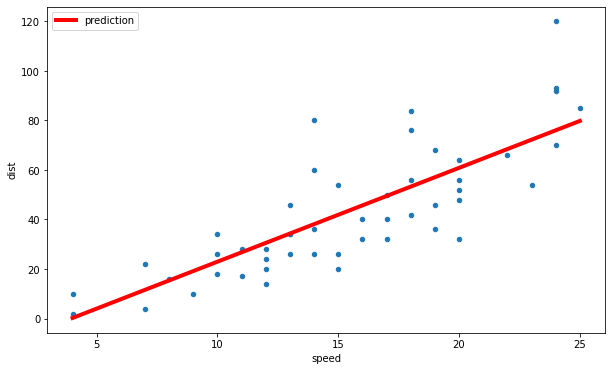

In [10]:
ax=df.plot(kind='scatter',x='speed',y='dist',figsize=(10,6))
df.plot(x='speed',y='prediction',ax=ax,color='red',linewidth=4)


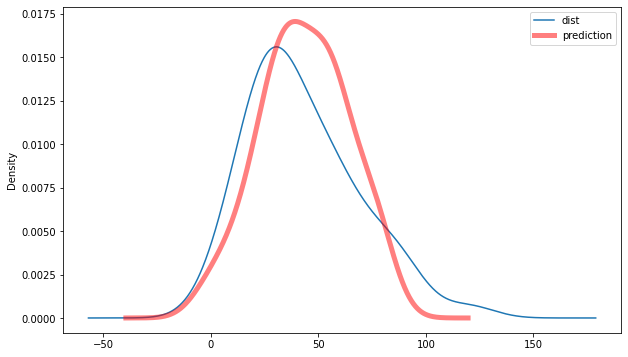

In [11]:
ax=df.plot(kind='kde',x='speed',y='dist',figsize=(10,6))
df.plot(kind='kde',x='speed',y='prediction',ax=ax,color='red',alpha=.5,linewidth=5)
plt.show()

In [12]:
#Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [13]:
r2_score(df.dist,df.prediction)

0.6499193875395108

In [14]:
mean_absolute_error(df.dist,df.prediction)

11.579285643417004

In [15]:
mean_squared_error(df.dist,df.prediction)

227.8253209447922

In [16]:
# Model saving
from joblib import dump 

In [17]:
dump(reg,"faltu_model_v1.pk1")

['faltu_model_v1.pk1']

In [18]:
del reg
del x

In [19]:
from joblib import load

In [20]:
reg=load("faltu_model_v1.pk1")

In [22]:
reg.predict([[45],[54]])

C:\Users\Hp\miniconda3\envs\digi\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[155.62967556],
       [189.74422066]])